# Daten importieren
*Datenquelle: [https://www.kaggle.com/datasets/gyanprakashkushwaha/laptop-price-prediction-cleaned-dataset](https://www.kaggle.com/datasets/gyanprakashkushwaha/laptop-price-prediction-cleaned-dataset)*

In [1]:
import pandas as pd

df = pd.read_csv("laptop_data.csv")
df

,Ram,Weight,Ppi,SSD,HDD,Price
0,8,1.37,226.983005,128,0,1117.575455
1,8,1.34,127.677940,0,0,1077.677732
2,8,1.86,141.211998,256,0,1032.993107
3,16,1.83,220.534624,512,0,1181.447594
4,8,1.37,226.983005,256,0,1147.310097
...,...,...,...,...,...,...
1268,4,2.20,100.454670,0,500,1055.525658
1269,4,1.80,157.350512,128,0,1043.389931
1270,16,1.30,276.053530,512,0,1128.811452
1271,2,1.50,111.935204,0,0,940.928303


In [2]:
df.describe()

,Ram,Weight,Ppi,SSD,HDD,Price
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,146.950812,186.252946,413.715632,1082.821823
std,5.098771,0.669241,42.926775,186.531571,518.054486,61.956502
min,2.000000,0.690000,90.583402,0.000000,0.000000,913.461633
25%,4.000000,1.500000,127.335675,0.000000,0.000000,1038.737929
50%,8.000000,2.040000,141.211998,256.000000,0.000000,1087.225536
75%,8.000000,2.310000,157.350512,256.000000,1000.000000,1128.744719
max,64.000000,4.700000,352.465147,1024.000000,2000.000000,1269.144113


# Daten aufteilen

In [6]:
X = df.copy()
y = X.pop("Price")

In [7]:
X

,Ram,Weight,Ppi,SSD,HDD
0,8,1.37,226.983005,128,0
1,8,1.34,127.677940,0,0
2,8,1.86,141.211998,256,0
3,16,1.83,220.534624,512,0
4,8,1.37,226.983005,256,0
...,...,...,...,...,...
1268,4,2.20,100.454670,0,500
1269,4,1.80,157.350512,128,0
1270,16,1.30,276.053530,512,0
1271,2,1.50,111.935204,0,0


In [8]:
y

,Price
0,1117.575455
1,1077.677732
2,1032.993107
3,1181.447594
4,1147.310097
...,...
1268,1055.525658
1269,1043.389931
1270,1128.811452
1271,940.928303


In [9]:
!pip install scikit-learn==1.5.2
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 70.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [10]:
X_train

,Ram,Weight,Ppi,SSD,HDD
940,8,2.75,127.335675,128,1000
10,4,1.86,100.454670,0,500
784,16,1.70,157.350512,512,0
1115,8,1.23,165.632118,256,0
481,4,2.18,100.454670,0,1000
...,...,...,...,...,...
763,8,1.20,276.053530,256,0
835,16,3.21,141.211998,256,1000
1216,8,2.80,106.113062,0,1000
559,4,2.18,100.454670,0,1000


In [11]:
y_train

,Price
940,1121.907400
10,995.165810
784,1171.579055
1115,1120.467490
481,1034.990418
...,...
763,1100.464859
835,1190.383371
1216,1026.527660
559,1040.188766


# Random Forest Regressor - Hyperparameteroptimierung mit GridSearchCV


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor(random_state=0)
param_grid = {
    'n_estimators': [200, 250],
    'max_depth': [10, 11]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=4, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

print("Best Mean Absolute Error: ", -grid_search.best_score_)
print("Best Parameters: ", grid_search.best_params_)

Best Mean Absolute Error:  22.32456061542641
Best Parameters:  {'max_depth': 10, 'n_estimators': 200}


# Random Forest Regressor - Finales Modell

In [13]:
from sklearn.metrics import mean_absolute_error

final_rf_model = grid_search.best_estimator_
y_predict_final = final_rf_model.predict(X_test)
mae = mean_absolute_error(y_predict_final, y_test)

print("Final MAE:", mae)

Final MAE: 20.5067300462836


# XGBoost - Hyperparameteroptimierung mit GridSearchCV

In [14]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=0)
param_grid = {
    "max_depth": [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=4, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

print("Best Mean Absolute Error: ", -grid_search.best_score_)
print("Best Parameter: ", grid_search.best_params_)

Best Mean Absolute Error:  21.62298416349998
Best Parameter:  {'max_depth': 4}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


# Early Stopping, um *n_estimators* besser zu bestimmen

In [15]:
X_train_new, X_valid, y_train_new, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

es_xgb_model = XGBRegressor(n_estimators=5000, max_depth=4, eval_metric="mae", early_stopping_rounds=70, random_state=0)
es_xgb_model.fit(X_train_new, y_train_new,
             eval_set=[(X_train_new, y_train_new), (X_valid, y_valid)],
             verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=70,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5000, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

# Besten Wert für *n_estimators* ausgeben:

In [16]:
print("Best value for n_estimators: ", es_xgb_model.best_iteration)

Best value for n_estimators:  62


# Ergebnisse visualisieren

In [17]:
results = es_xgb_model.evals_result()

In [18]:
errors_df = pd.DataFrame({
    "Train Error": results["validation_0"]["mae"],
    "Valid Error": results["validation_1"]["mae"],
})
errors_df

,Train Error,Valid Error
0,39.565657,42.521408
1,32.793739,36.451903
2,28.512763,32.150871
3,25.732542,29.605045
4,23.726825,27.785558
...,...,...
128,11.756523,21.979472
129,11.718726,21.919211
130,11.689466,21.897276
131,11.643584,21.930603


Text(0, 0.5, 'MAE')

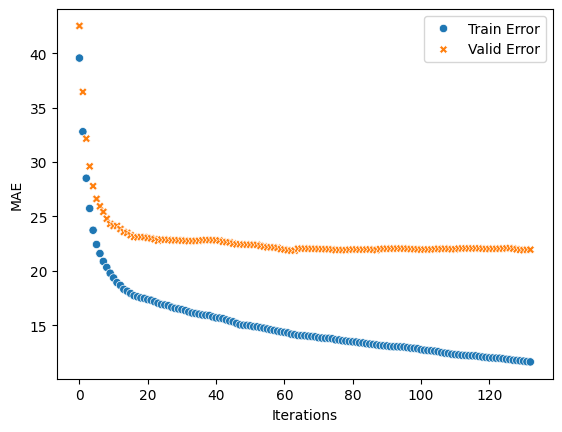

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(errors_df)
plt.xlabel("Iterations")
plt.ylabel("MAE")

# XGBoost Regressor - Finales Modell

In [20]:
final_xgb_model = XGBRegressor(n_estimators=62, max_depth=4, random_state=0)
final_xgb_model.fit(X_train, y_train)

y_predict_final = final_xgb_model.predict(X_test)
mae = mean_absolute_error(y_predict_final, y_test)

print("Final MAE:", mae)

Final MAE: 20.739695644016727
